# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# Reading Dataset

In [2]:
df = pd.read_csv('iris.csv')
print(df.shape)
df.head()

(150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Holdout Validation

In [3]:
from sklearn.model_selection import train_test_split
y=df['variety']
X = df.drop('variety', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, 
                                                    stratify = y)

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# Evaluating Random Forest Classifier

In [5]:
from sklearn.metrics import accuracy_score
print("Train Accuracy", accuracy_score(clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(clf.predict(X_test), y_test))
y_pred = clf.predict(X_test)

Train Accuracy 1.0
Test Accuracy 0.9333333333333333


# Confusion Matrix

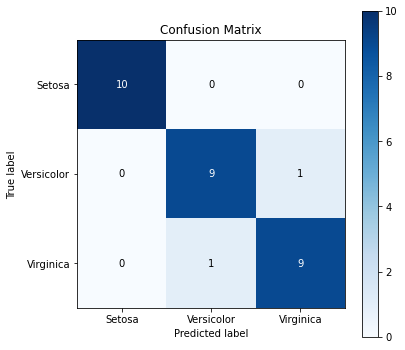

In [6]:
skplt.metrics.plot_confusion_matrix(y_test, clf.predict(X_test), figsize = (6,6));

# Classification Report

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# ROC Curve

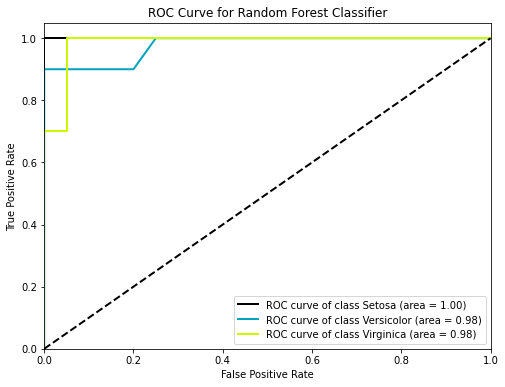

In [8]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Random Forest Classifier");

# Precision-Recall Curve

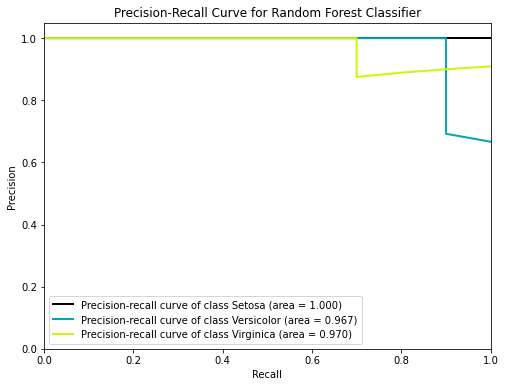

In [9]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False, 
                                   title = "Precision-Recall Curve for Random Forest Classifier");

# Feature Importance

In [10]:
X.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')

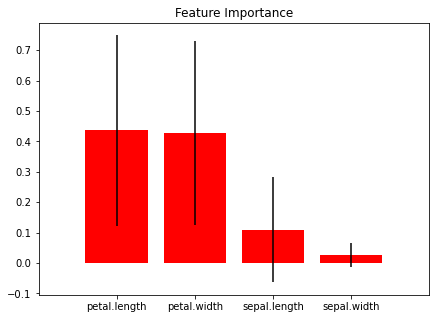

In [11]:
skplt.estimators.plot_feature_importances(clf, feature_names = X.columns, figsize = (7,5));

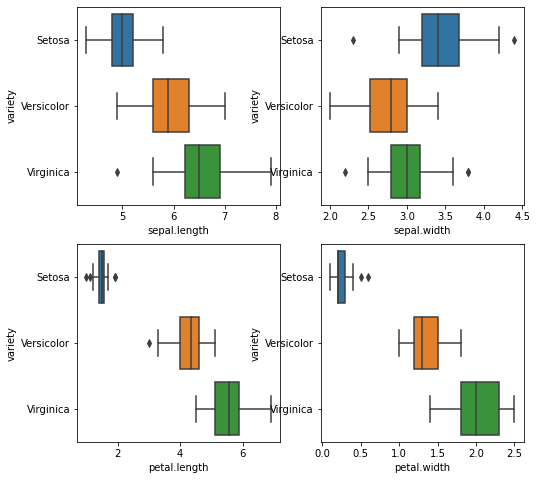

In [12]:
featuresList = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
plt.figure(figsize = (8,8))
subplot_no = 221
for f in featuresList:
    plt.subplot(subplot_no)
    sns.boxplot(data = df, x = f, y = 'variety')
    subplot_no = subplot_no + 1

# Learning Curve

In [13]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_acc, val_acc = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_acc.append(accuracy_score(y_train[:m], y_train_predict))
        val_acc.append(accuracy_score(y_val, y_val_predict))

    plt.plot(train_acc, "r-+", linewidth=2, label="train")
    plt.plot(val_acc, "b-", linewidth=3, label="val")
    plt.legend(fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("Accuracy", fontsize=14)              # not shown

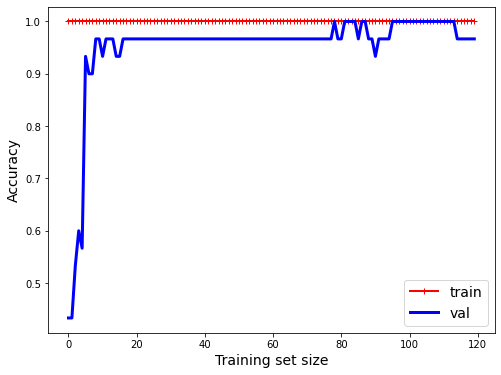

In [14]:
plt.figure(figsize = (8,6))
plot_learning_curves(clf, X, y)